# Assignment 2 - Edmund's forum
### Names : Anisha Garg, Catherine McNabb, Cuiting Zhong, Lining Jiang, Kirti Pande 

## 1.
#### Develop a crawler/scraper using Selenium to fetch messages posted in Edmunds.com discussion forums. The crawler output should be a .csv file with the following columns: date, userid, and message (even though you will only use the messages in your analysis). Before you develop the crawler, carefully study one of the forums on Edmunds.com to understand the html as well as the threading structures. 

In [ ]:
#Creating  webdriver instance for scrapper
from selenium import webdriver
chrome_path = r'C:\Users\kirti\Downloads\chromedriver_win32\chromedriver.exe'

In [2]:
#Opeining chrome
driver = webdriver.Chrome(chrome_path)

In [6]:
#Going to the website in chrome
driver.get("https://forums.edmunds.com/categories/jaguar")

In [7]:
#For the first Question we have decided to go to the below link,scrape the website and store it in a csv file
python_button = driver.find_element_by_link_text("2018 Jaguar F-Type Lease Deals and Prices")
python_button.click()

In [8]:
#Using Beautiful Soup to get rid of blockQuotes
from bs4 import BeautifulSoup
cleantext = []
def readposts():
    soup = BeautifulSoup(driver.page_source, "html.parser")
    text = soup.find_all('div',{'class':'Message userContent'})
    for t in text:
        if t.find('blockquote'):
            try:
                cleantext.append(t.contents[2].strip())
            except:
                cleantext.append(u"")
        else:
            cleantext.append(t.contents[0].strip()) 
    return cleantext

In [9]:
import pandas as pd
d = {'date': [], 'userid': [], 'message': []}
df_old = pd.DataFrame(data=d)
df_new = pd.DataFrame(data=d)
def extract2():
    df = pd.DataFrame(data=d)
    user = driver.find_elements_by_class_name('Author')
    date = driver.find_elements_by_css_selector('.MItem.DateCreated') 
    posts = readposts()
    length = len(user)
    for i in range(length):
        df.loc[i] = [date[i].text,user[i].text,posts[i]]
    df = df.replace('\n',' ', regex=True)
    return df

In [10]:
for i in range(7):
    xpath = '//*[@id="PagerBefore"]/a[{0}]'.format(str(i+2))
    driver.find_element_by_xpath(xpath).click()
    df_new = extract2()
    df_old = pd.concat([df_old,df_new]).reset_index(drop=True)

In [11]:
df_old[df_old["message"] == ""] = 0
df_old = df_old[df_old['message'] != 0]

In [9]:
df_old.to_csv(r'C:\Users\kirti\Downloads\MSBA\Text_Analytics\Assignment_2\ta2Q1.csv')

## 2.
#### Fetch around 5,000 posts about cars from a General topics forum. Do NOT choose a forum dedicated to a particular brand or model. Instead, you can choose the General & Sedans categories and then select, for example, the Entry Level Luxury forum https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans .The idea is to have multiple brands and models being discussed without one of them being the focal point

##### We are using the url : https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans


In [16]:
# Create a new instance and go to the url mentioned above
driver = webdriver.Chrome(chrome_path)
driver.get("https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans")

In [15]:
#Scrapping the comments section to obtain posts from page 703 to 500
d2 = {'posts': []}
cleantext = []
for i in range(703,500,-1):
    cl = str(i)
    driver.find_element_by_link_text(cl).click()
    df_post = readposts()

In [17]:
#Since we gotrid of blockquotes in the process; the empty entries after removing them are being filtered out
length = len(df_post)
df_o_post = list()
for i in range(length):
        if(df_post[i] !=''):
            df_o_post.append(df_post[i])

In [18]:
df_o_post = pd.Series(df_o_post)

In [19]:
#Writing 6000 entries to be on a safer side 
df_o_post = pd.Series(df_o_post.iloc[:6000])
df_o_post.to_csv(r'C:\Users\kirti\Downloads\MSBA\Text_Analytics\Assignment_2\ta2Q2.csv')

## 3.
#### Once you fetch the data, find the top 10 brands from frequency counts. You will need to write a script to count the frequencies. Be sure not to count a mention more than once per post, even if it is mentioned multiple times. Replace models with brands so that from now on you have to deal with only brands and not models. You will need another script for this job. This step is meant to help simplify the analysis. A list of model and brand names (not exhaustive) are provided in a separate file.   

In [281]:
import pandas as pd
import re
file_encoding = 'cp1252'
df_posts=pd.read_csv(r'C:\Users\kirti\Downloads\MSBA\Text_Analytics\Assignment_2\ta2Q2.csv',header=None)
s_post=df_posts[1]
s_post=s_post[s_post.notnull()]

brand_model = pd.read_csv(r'C:\Users\kirti\Downloads\MSBA\Text_Analytics\Assignment_2\models_new.csv',encoding=file_encoding)

s_brand=brand_model['Brand'].map(lambda x:x.lower())
s_brand=s_brand.map(lambda x:x.replace('.','').replace(',','').replace('-',' '))
s_model=brand_model['Model'].map(lambda x:x.lower())
s_model=s_model.map(lambda x:x.replace('?',''))

In [282]:
import re
s_post_converted=s_post.map(lambda x:x.lower())

for i,m in enumerate(s_model):
    s_post_converted=s_post_converted.map(lambda x:re.sub(str(m), s_brand[i],str(x)))

In [283]:
brands=s_brand.unique()
brands

array(['acura', 'alfaromeo', 'audi', 'bentley', 'bmw', 'bugatti', 'buick',
       'cadillac', 'chevrolet', 'chrysler', 'dodge', 'ford', 'gm',
       'honda', 'hyundai', 'hyundai kia', 'infiniti', 'jaguar', 'kia',
       'lamborghini', 'lexus', 'lincoln', 'mazda', 'mercedes', 'mercury',
       'mitsubishi', 'nissan', 'pontiac', 'porsche', 'saab', 'saturn',
       'skoda', 'subaru', 'suzuki', 'tesla', 'toyota', 'volkswagen',
       'volvo'], dtype=object)

In [287]:
brands_edited=['acura', 'alfaromeo', 'audi', 'bentley', 'bmw', 'bugatti', 'buick',
       'cadillac', 'chevrolet', 'chrysler', 'dodge', 'ford', 'gm',
       'honda', 'hyundai', 'hyundai kia', 'infiniti', 'jaguar', 'kia',
       'lamborghini', 'lexus', 'lincoln', 'mazda', 'mercedes', 'mercury',
       'mitsubishi', 'nissan', 'pontiac', 'porsche', 'saab', 'saturn',
       'skoda', 'subaru', 'suzuki', 'tesla', 'toyota', 'volkswagen',
       'volvo']

In [288]:
brand_dict = dict(zip(brand_model.iloc[:,1], brand_model.iloc[:,0]))

def repl(text):
    words = text.lower().split()
    final_string = ' '.join(str(brand_dict.get(word.strip('.,;!?'), word)) for word in words)
    return final_string

s_post_converted2 = s_post_converted.map(repl)

def brand_in_it(brand,post):
    if brand in post:
        return 1
    else: 
        return 0
    
temp={'post': s_post_converted}
for brand in brands_edited:
    temp[brand]=s_post_converted2.map(lambda x:brand_in_it(brand,x))

In [289]:
#Top 10 brands from the frequency counts are as follows
df2=pd.DataFrame(temp)
s_A=df2.drop('post',axis=1).sum() #A/#B
s_A = s_A.sort_values(ascending=False).head(10)
print ("Top 10 brands:",'\n', s_A)

Top 10 brands: 
 audi          1350
bmw            927
acura          865
mercedes       590
cadillac       310
honda          223
ford           204
infiniti       161
volkswagen     143
lexus          131
dtype: int64


## Task A:
#### Identify top 10 brands by frequency. From the posts, calculate lift ratios for associations between the brands. You will have to write a script to do this task). Show the brands on a multi-dimensional scaling (MDS) map (use a Python script for MDS, there are multiple scripts available on the Internet). 

In [290]:
brands_edited_top_10 = s_A.index.values
brands_edited_top_10

array(['audi', 'bmw', 'acura', 'mercedes', 'cadillac', 'honda', 'ford',
       'infiniti', 'volkswagen', 'lexus'], dtype=object)

In [291]:
#association of brand A and brand B
def brandAB_in_it(brandA,brandB,post):
    if brandA in post and brandB in post:
        return 1
    else: 
        return 0
temp2={'post': s_post_converted}

#Filterign for only the top 10 brands
for brandA in brands_edited_top_10:
    for brandB in brands_edited_top_10:
        temp2[brandA+', '+brandB]=s_post_converted.map(lambda x:brandAB_in_it(brandA,brandB,x))

In [292]:
df3=pd.DataFrame(temp2)
df4=df3.drop('post',axis=1)

In [293]:
m_AB=df4.sum().values.reshape([10,10])  #get the count of association
df_AB=pd.DataFrame(m_AB)
#setting the column name and index
df_AB.columns=brands_edited_top_10
df_AB=df_AB.set_index(pd.Series(brands_edited_top_10))

In [294]:
N=len(s_post)
df_lift=df_AB.copy()
#Lift calculation for top 10 brands
for i in range(10):
    for j in range(10):
        df_lift.iloc[i,j]=N*df_AB.iloc[i,j]/(s_A[i]*s_A[j])
df_lift

,audi,bmw,acura,mercedes,cadillac,honda,ford,infiniti,volkswagen,lexus
audi,3.380000,1.334498,1.355908,1.369186,1.482839,1.394439,1.192941,1.742484,1.654545,1.444885
bmw,1.334498,4.922330,1.058443,1.660244,1.556091,1.081588,1.761422,1.559247,0.722860,1.653302
acura,1.355908,1.058443,5.275145,1.359020,1.157128,2.767677,1.163635,1.736538,1.180452,1.771804
mercedes,1.369186,1.660244,1.359020,7.733898,1.521832,1.560652,1.326894,1.393062,1.568413,2.066309
cadillac,1.482839,1.556091,1.157128,1.521832,14.719355,0.792073,0.937998,1.462793,0.411730,2.359591
honda,1.394439,1.081588,2.767677,1.560652,0.792073,20.461883,2.106370,1.143832,2.575622,1.561976
ford,1.192941,1.761422,1.163635,1.326894,0.937998,2.106370,22.367647,0.694647,2.815508,0.682982
infiniti,1.742484,1.559247,1.736538,1.393062,1.462793,1.143832,0.694647,28.341615,0.000000,4.110616
volkswagen,1.654545,0.722860,1.180452,1.568413,0.411730,2.575622,2.815508,0.000000,31.909091,0.487162
lexus,1.444885,1.653302,1.771804,2.066309,2.359591,1.561976,0.682982,4.110616,0.487162,34.832061


In [295]:
#Dissimilarity Matrix
df_lift_r=1/df_lift

for i in range(10):
    df_lift_r.iloc[i,i]=0
df_lift_r

,audi,bmw,acura,mercedes,cadillac,honda,ford,infiniti,volkswagen,lexus
audi,0.000000,0.749345,0.737513,0.730361,0.674382,0.717134,0.838264,0.573893,0.604396,0.692096
bmw,0.749345,0.000000,0.944784,0.602321,0.642636,0.924566,0.567723,0.641335,1.383394,0.604850
acura,0.737513,0.944784,0.000000,0.735824,0.864208,0.361314,0.859376,0.575858,0.847133,0.564396
mercedes,0.730361,0.602321,0.735824,0.000000,0.657103,0.640758,0.753640,0.717843,0.637587,0.483955
cadillac,0.674382,0.642636,0.864208,0.657103,0.000000,1.262510,1.066100,0.683624,2.428775,0.423802
honda,0.717134,0.924566,0.361314,0.640758,1.262510,0.000000,0.474750,0.874254,0.388256,0.640215
ford,0.838264,0.567723,0.859376,0.753640,1.066100,0.474750,0.000000,1.439579,0.355176,1.464168
infiniti,0.573893,0.641335,0.575858,0.717843,0.683624,0.874254,1.439579,0.000000,inf,0.243273
volkswagen,0.604396,1.383394,0.847133,0.637587,2.428775,0.388256,0.355176,inf,0.000000,2.052707
lexus,0.692096,0.604850,0.564396,0.483955,0.423802,0.640215,1.464168,0.243273,2.052707,0.000000


#### MDS plot code

In [303]:
m_lift=df_lift_r.values
from sklearn import manifold
import matplotlib.pyplot as plt
import seaborn
import numpy as np
import sklearn

MDS_cars = sklearn.manifold.MDS(n_components=2, metric=True, dissimilarity='precomputed')

#Operations on dissimilarity matrix to read into MDS function
dissimilarity = df_lift_r.replace([np.inf, -np.inf], np.nan)
dissimilarity.fillna(999, inplace=True)
npos = MDS_cars.fit_transform(dissimilarity)

seed = np.random.RandomState(seed=99)
mds = manifold.MDS(n_components=2, max_iter=20000, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)
x_mds= mds.fit(dissimilarity.astype(np.float32)).embedding_
x_mds = x_mds[[0,1,2,3,4,5,6,9]]  #removing the outliers

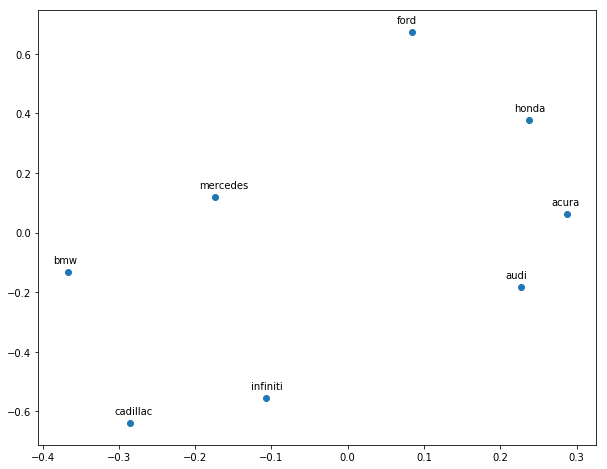

In [304]:
#Here we focussed on only 8 brands since 2 of the brands infinity and volkswagen had infinite distance between them.
#These 2 brands were very far off compared to the rest of them hence we have dropped them while plotting the mds plot

fig = plt.figure(figsize=(10, 8))
x=x_mds[:,0]
y=x_mds[:,1]

label=df_lift.columns.values
plt.scatter(x, y)
for i in range(8):
    plt.text(x[i]-0.02,y[i]+0.03,label[i])
plt.show()

## Task B



#### What insights can you offer brand managers from your analysis in Task A (choose two brands that you can offer the most interesting/useful insights for)? 

##### Acura
The Acura brand manager has valuable insights in this MDS plot. Acura is closest to Audi and Honda, and not really close to any other brand. This is a very unique position to be in – between a luxury brand and a practical brand. Perhaps consumers see Acuras as very well-priced cars, but they also are comfortable and look good, like Audis. 

A brand manager can exploit this position by making sure all product positioning includes all of Acura’s best features – it’s practical, but also sporty and comfortable. A brand manager can emphasize these traits, as well as market to a wider audience, since they could probably sell to some of Audi’s customers, as well as some of Honda’s. 

##### Chrysler
Chrysler’s positioning is also unique. It is far away from all of the other brands pictures in the MDS plot. A brand manager should figure out what attributes make Chrysler so unique, and exploit the positive attributes associated with it. Perhaps customers like Chrysler just because it is so different than other brands. 

Chrysler is considered both mainstream and a bit luxury, so it cannot firmly be put into either category. It is also not as well known generally as the other brands in the plot. The brand manager for Chrysler may want to give more brand recognition to its brand, but also continue to position it as unique. 


## Task C: 
#### What are 5 most frequently mentioned attributes of cars in the discussions? Note that the same attribute may be described by different words – e.g., pick-up and acceleration may both refer to a more general attribute, “performance”. You have to make suitable replacements. Now pick the 5 most frequently mentioned brands. Which attributes are most strongly associated with which of these 5 brands? You DON’T have to do a sentiment analysis for this assignment.

In [305]:
import pandas as pd
import re
df_posts=pd.read_csv(r'C:\Users\kirti\Downloads\MSBA\Text_Analytics\Assignment_2\ta2Q2.csv',header=None)
s_post=df_posts[1]
s_post=s_post[s_post.notnull()]

brands = brands_edited

brand_model = pd.read_csv(r'C:\Users\kirti\Downloads\MSBA\Text_Analytics\Assignment_2\models_new.csv',encoding=file_encoding)
#Cleaning basic text
s_brand=brand_model['Brand'].map(lambda x:x.lower())
s_brand=s_brand.map(lambda x:x.replace('.','').replace(',','').replace('-',' '))
s_model=brand_model['Model'].map(lambda x:x.lower())
s_model=s_model.map(lambda x:x.replace('?',''))

sub_super=pd.read_csv(r'C:\Users\kirti\Downloads\MSBA\Text_Analytics\Assignment_2\attributes.csv')
attribute_dict = dict(zip(sub_super.iloc[:,0], sub_super.iloc[:,1]))

In [306]:
import re
s_post_converted=s_post.map(lambda x:x.lower())

for i,m in enumerate(s_model):
    s_post_converted=s_post_converted.map(lambda x:re.sub(str(m), s_brand[i],str(x)))

In [307]:
def remove_pun(text):
    '''remove all those punctuations
    and add a space before and after each brand name'''
    pun=['.',',',';',':','\\','?','(',')','-','"','/','\'s']
    for p in pun:
        text=text.replace(p,' ')
    for brand in brands:
        text=text.replace(brand,' '+brand+' ')
    return text

posts_nopun=s_post_converted.map(lambda x:remove_pun(str(x)))

In [308]:
from nltk.corpus import stopwords

def remove_stp(text):
    '''remove stopwords'''
    stp_removed = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return stp_removed

posts_nostp=posts_nopun.map(lambda x:remove_stp(x))

In [309]:
# first check if a brand in a text and import re
def find_idx(brand, text): 
    ''' find the indexs of a brand in a post;
        check if a brand in a post first,
        and need to import re'''
    total_count=len(re.findall(brand,text))
    token=text.split()
    idx_temp = token.index(brand)
    idx=idx_temp
    idx_list=[idx]
    count=1
    while idx<len(token) and count<total_count:
        idx_temp = token[idx+1:].index(brand)
        idx=idx+idx_temp+1
        idx_list.append(idx) 
        count+=1
    return idx_list

In [310]:
def features(brand,text):
    '''find feature list for a brand in a post
    using find_idx function to get the indexs of a brand in a post,
    and then take +5 and -5 words based on these indexs'''
    idx_list=find_idx(brand,text)
    token=text.split()
    feature_list=[]
    for i in idx_list:
        feature_list=feature_list+token[max(0,i-5):i]+token[i+1:min(i+6,len(token))]
    return feature_list

In [342]:
def find_attr(brand, text):
    '''find the unique general attribute in a post for a brand
       convert the features into general attributes using pre-defined attribute_dict'''
    if brand in text:
        f=features(brand, text)
        attribute=pd.Series([attribute_dict.get(w) for w in f])
        attribute=attribute[attribute.notnull()]
        result=list(attribute)#unique()) 
    else:
        result=[]
    return result

In [343]:
# find the top 5 most frequently mentioned attributes
def find_total_attr(text):
    '''find any atribute mentioned in a post'''
    attribute=pd.Series([attribute_dict.get(w) for w in text.split()])
    attribute=attribute[attribute.notnull()]
    return list(attribute)

total_attr=posts_nostp.map(lambda x:find_total_attr(x)).sum()
pd.Series(total_attr).value_counts()

performance       2432
comfort            514
sustainability     473
cost               462
mpg                365
safety             241
appearance         219
emission            27
dtype: int64

In [344]:
# find the top 5 most frequently mentioned attributes associated with a brand
# top 5 brand: 'audi', 'bmw', 'acura', 'mercedes', 'cadillac'
top_brand=['audi', 'bmw', 'acura', 'mercedes', 'cadillac']
attr={}
for brand in top_brand:
    attr_unique[brand]=posts_nostp.map(lambda x:find_attr(brand,x))

In [345]:
s_bmw=pd.Series(attr_unique['bmw'].sum()).value_counts()
s_cadillac=pd.Series(attr_unique['cadillac'].sum()).value_counts()
s_audi=pd.Series(attr_unique['audi'].sum()).value_counts()
s_mercedes=pd.Series(attr_unique['mercedes'].sum()).value_counts()
s_acura=pd.Series(attr_unique['acura'].sum()).value_counts()
df_attr=pd.concat((s_audi,s_bmw,s_acura,s_mercedes,s_cadillac),axis=1,sort=False)
df_attr.columns=top_brand

In [346]:
#The attribute list
df_attr

,audi,bmw,acura,mercedes,cadillac
performance,504,454,277,104.0,81.0
comfort,92,64,54,64.0,39.0
cost,83,76,45,41.0,13.0
sustainability,79,74,24,15.0,12.0
mpg,71,38,30,26.0,3.0
safety,39,21,13,4.0,3.0
appearance,36,28,22,15.0,13.0
emission,3,4,4,NaN,NaN


The five most mentioned attributes are performance, comfort, sustainability, cost, and mpg. The five most mentioned brands are BMW, Audi, Acura, Honda, and Chrysler.  

We can see the attributes most representative of each brand in the proportional graph below. BMW tends to have comments about its sustainability and emission, more so than other brands.  Audi user comment on its comfort, MPG and safety more than other brands, which is unexpected. Acura owners discuss emission and comfort. Honda owners talk about their cars’ appearance, MPG, and safety, and Chrysler owners tend to mention comfort, appearance, and sustainability.

In regards to BMW being known as the “ultimate driving machine”, the data we found does support this to an extent. One of the most talked about attributes for BMWs is performance, which is obviously an indicator for an “ultimate driving machine”.  However, comfort and appearance were talked about at a lower proportion than some of the other brands on the list. These are features that should be associated with an “ultimate” car, even though they do not affect performance. So, we can assume that the BMW is a great driving machine, but it’s not necessarily the best-looking car out there. 

Moreover, it has a lot of mentions of “sustainability”, which is typically associated with negative words. Some of the words under the cover of sustainability are “maintenance”, “broken”, and “repair”, which does not bode well for the brand. Because sustainability was mentioned so often with BMW, we can assume that many car owners find BMW’s either difficult to repair or the need to repair the car a little bit too often. 


## Task D: 
#### What advice will you give to a (i) product manager, and (ii) marketing/advertising manager of these brands based on your analysis in Task C? For this assignment, you can assume the sentiment (e.g., that it is positive). 

The attributes listed above that are associated with each brand are a clear place to start for both the product manger and advertising manager. For the product manager, probably what is most important is the features of the car. So, the product manager should pay attention to what is included in “performance” and “appearance”, because customers are interested in specific features for each of those attributes. 

For BMW, the product manager should be concerned that it seems that BMW is not being associated with comfort as much as some of the other top mentioned brands. Perhaps, the manager can start researching what is different about BMW and Audi, which has a higher proportion of mentions in relation to comfort. The brands are pretty similar, so the product manager may be able to use some of Audi’s attributes as inspiration for BMW. 

Sustainability is very high as well, which is an attribute associated with terms like “repairs”, “warranty”, “damage”, etc. The product manager should be concerned that BMWs are breaking down and the customers are noticing. 
The marketing manager should certainly emphasize the performance, which is mentioned a lot in conjunction with BMW. 

For Chrysler, the product manager should be concerned that performance and safety are not associated very well with the brand. The product manager should look into improving both of those features, as they are desirable from a customer’s point of view. Sustainability is also high for Chrysler, so the product manager should be concerned that Chrysler owners are often needing repairs for their cars, more than other brands. 

The advertising manager for Chrysler should look at emphasizing comfort and appearance, which both scored proportionally high. These are great attributes that can be used easily in ads. 

For Audi, the product manager can look at emission and mpg. Proportionally, Audi has very few mentions of emission associated with the car, which is good, because the “emission” attribute most often corresponds to negative words like “exhaust” and “pollute”. It has very high mentions of mpg, which includes words like “efficient” and “mileage” and is more positive. The product manager should know that Audi customers tend to care about their cars’ effect on the environment, and continue to research and innovate in that area. 

Safety is also mentioned a lot in conjunction with Audi, so the marketing manager can use this trait in advertising. Customers know that Audi is luxurious and sporty, and so the manager emphasizing that it’s a safe car as well could be a good positioning of the brand. 

For Honda, appearance and safety are the most mentioned. The product manager can know that safety is very important to Honda owners, and continue to prioritize safety in product design. This is part of what sets the brand apart, so it’s important that product managers know the consumer sentiment. 

Honda’s marketing managers need to make sure that the appearance of the car is clear, since customers tend to have positive sentiment about appearance, and also emphasize the safety of the vehicle. These two traits can help both the product and marketing managers for Honda. 

Finally, for Acura, product managers need to be aware that customers are associating the brand with “emission”, which includes words like “carbon”, “pollute”, and “dirty”. The product managers should work on making Acura more environment-friendly, and then the marketing managers should advertise that once it’s fixed. 

In the meantime though, marketing managers for Acura can emphasize comfort and appearance, which are both mentioned with the brand name often. These are easy associations to show in advertising. 


## Task E: 
#### Which is the most aspirational brand in your data in terms of people actually wanting to buy or own? Describe your analysis. What are the business implications for this brand?

The question requires us to find the most aspirational brands, here we are taking into account aspirational bigrams mentioned below and calculating the lift between them and the brands in each post. The brand with the highest lift indicates a larger aspiration rate. We have taken a limit of +5 and -5 words from the location of the brand to avoid influence by the occurences of other brands on the brand in focus.

Calculation of lift: Lift = P(A,B)/(P(A) P(B)) = (n(A,B) N)/ (n(A) * n(B)) 
In our case, A -> Brand B -> Aspiration words N -> number of posts 
P(A,B) = n(A,B)/N n(A,B) -> number of posts for each brand which indicates aspiration
P(A) ->n(A)/N n(A) -> number of posts which have a brand influence
P(B) ->n(B)/N n(B) -> For each brand,the number of brands which indicate aspiration to buy the car!


Using this analysis method, we can see that Jaguar has the highest lift for aspirational value, followed by Kia, Ford, Chevrolet and Lexus. This means that customers would like to own or buy a Jaguar the most in comparison to the other brands mentioned. Jaguar clearly is a dream car for quite a few people. When we looked at the attributes that define Jaguar in our posts we found that performance and appearance ranked the highest in the list.
Kia ranks second which shows that even though Kia is not as flashy or luxurious as some of the other brands on the list, it is a great brand to own. The attributes which stood out for Kia were performance, cost and comfort.
In terms of business implications, Kia can advertise how versatile the brand is. Customers may say that they “want” this brand so often because it is great for a person of any age. It is a safe and affordable car to have for younger customers, but there are also several models which are great cars for customers with families, who may need practicality and space. This gives the advertising team a lot of flexibility and a very large target market. With a larger target market, it is easier to make more sales with mass appeal. 
Ford and Chevy rank performance as the attribute that defines them the best.Finally,Lexus is best defined with respect to performance and comfort. However, we wish they knew about it's killer sound system!

In [335]:
#filterv and filterv2 have the aspirational bigram combinations
filterv = ['love','hope','want','wish','dream','desire','crave','buy','purchase','wanted','always']
filterv1= ['hope','want','wish','dream','desire','crave','buy','purchase','wanted','always']
filterv2 = ['to','have','car','it','of','this']
filter_set = set(filterv)
filter_set2 = set(filterv2)

#function to return the occurence of aspirtaional bigrams for every brand
def find(brand,text):
    list_bg = []
    if(brand in text):
        f=features(brand,text)
        bg = list(zip(*[f[i:] for i in range(2)]))
        for i,j in enumerate(bg):
                if(len(j) != 0):
                     if((j[0] in filter_set) & (j[1] in filter_set2)):
                      #if((j[0] in filter_set)):
                         list_bg.append(j)
        return len(list_bg)

In [336]:
brand_asp = {}
for brand in brands:
    brand_asp[brand] = posts_nopun.map(lambda x: find(brand,x))

In [337]:
#Creating a dataframe to calculate number of posts with aspirations for every brand(asp_brand) 
#and number of posts with aspirations

asp_table = pd.DataFrame(columns = brands)
for brand in brands:
    asp_table[brand]=brand_asp[brand]
asp_table2 = asp_table.fillna(0)

asp_entries = asp_table2.sum(axis=1)
asp_brand = asp_table2[asp_table2 > 0].count(axis = 0)
no_asp = 0
for i in asp_entries.iteritems():
    if(i[1]>0):
        no_asp +=1

In [176]:
# asp_table

In [338]:
#Calculating number of posts with brands mentioned
#Creating a dataframe with required values to calculate lift
bc = []
aspiration = pd.DataFrame(columns=['brand','asp_brand_count','brand_occurence'])
aspiration['brand'] = brands
for brand in brands:
    count = 0
    for i in asp_table[brand].iteritems():
        if(i[1] is not None):
            if(math.isnan(i[1]) == False):
                count = count + 1
    bc.append(count)
aspiration['asp_brand_count'] = asp_brand.values
aspiration['brand_occurence'] = bc

In [341]:
#Calculate lift for each brand = (n(posts with brand & aspiration)*len(posts))/(n(posts with aspirations)*n(posts with brand))
aspiration['lift'] = (aspiration['asp_brand_count']*len(posts_nopun))/(no_asp * aspiration['brand_occurence'])
print("Top 5 Aspirational brands:")
aspiration.sort_values(by='lift',ascending=False).iloc[:5]

Top 5 Aspirational brands:


,brand,asp_brand_count,brand_occurence,lift
17,jaguar,2,46,4.508893
18,kia,2,81,2.560606
11,ford,4,204,2.033422
8,chevrolet,1,56,1.851867
20,lexus,2,131,1.583276
